In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam

In [29]:
df = pd.read_csv('../My_DATASET/breast_cancer.csv')

In [30]:
backup_data = df.copy() 

In [31]:
df.head()

,id,diagnosis Malignant Benign,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
df.shape

(569, 32)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          569 non-null    int64  
 1   diagnosis Malignant Benign  569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   texture_mean                569 non-null    float64
 4   perimeter_mean              569 non-null    float64
 5   area_mean                   569 non-null    float64
 6   smoothness_mean             569 non-null    float64
 7   compactness_mean            569 non-null    float64
 8   concavity_mean              569 non-null    float64
 9   concave points_mean         569 non-null    float64
 10  symmetry_mean               569 non-null    float64
 11  fractal_dimension_mean      569 non-null    float64
 12  radius_se                   569 non-null    float64
 13  texture_se                  569 non

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [35]:
# label encoding

df.replace({'diagnosis Malignant Benign':{'B':0,'M':1}}, inplace=True)

In [36]:
df.head()

,id,diagnosis Malignant Benign,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Perform EDA on this dataset

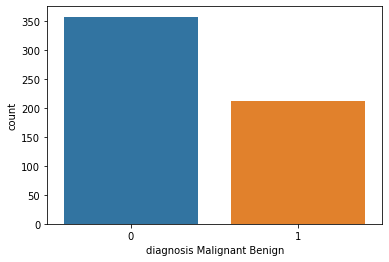

In [37]:
sns.countplot(x= df['diagnosis Malignant Benign']);

In [47]:
X = (df.drop(df[['id','diagnosis Malignant Benign']], axis=1))
y = df['diagnosis Malignant Benign']

# Perform train_test_split of the data

In [50]:
from sklearn.model_selection import train_test_split 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform data scalling

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [59]:
scaled_X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

# Build ML classification models 

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()  #C=2.3, max_iter=1000
log.fit(scaled_X_train, y_train)

LogisticRegression()

In [62]:
from sklearn.svm import LinearSVC
Lsvc = LinearSVC()
Lsvc.fit(scaled_X_train, y_train)

LinearSVC()

In [63]:
from sklearn.svm import SVC
base_svc = LinearSVC()
base_svc.fit(scaled_X_train, y_train)

LinearSVC()

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [65]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(scaled_X_train, y_train)

AdaBoostClassifier()

## TASK: Use a GridSearchCV to run a grid search for the best C and gamma parameters.

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
svc = SVC(class_weight='balanced')
param_grid = {'C':[0.001, 0.1, 1, 1.5],'kernel':['linear','rbf'], 'degree':[2,3, 4], 'gamma':['scale','auto']}
svcgrid = GridSearchCV(svc,param_grid)
svcgrid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.1, 1, 1.5], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [68]:
svcgrid.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

# Performance Evaluation

In [69]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [71]:
def report(model):
    preds = model.predict(scaled_X_test)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, scaled_X_test, y_test)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



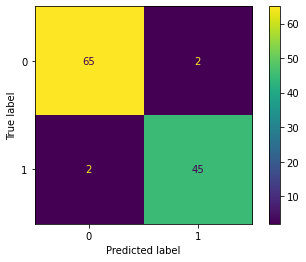

In [72]:
print("LOGISTIC REGRESSION MODEL")
report(log)

LINEAR SUPPORT VECTOR CLASSIFIER MODEL
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



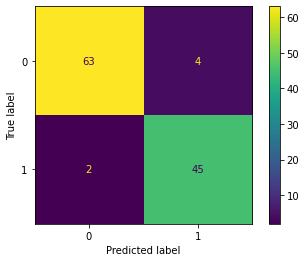

In [73]:
    print("LINEAR SUPPORT VECTOR CLASSIFIER MODEL")
    report(Lsvc)

BASE SUPPORT VECTOR CLASSIFIER MODEL
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



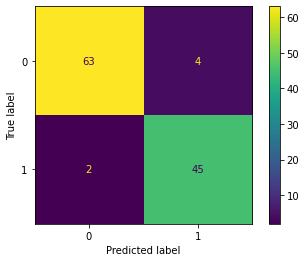

In [74]:
print("BASE SUPPORT VECTOR CLASSIFIER MODEL")
report(base_svc)

RANDOM FOREST MODEL
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



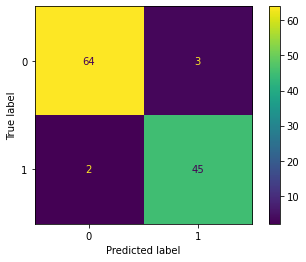

In [75]:
print("RANDOM FOREST MODEL")
report(rf)

ADABOOST CLASSIFIER MODEL
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



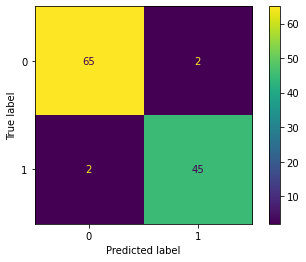

In [76]:
print("ADABOOST CLASSIFIER MODEL")
report(ada_model)

GRID_SUPPORT VECTOR CLASSIFIER MODEL
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



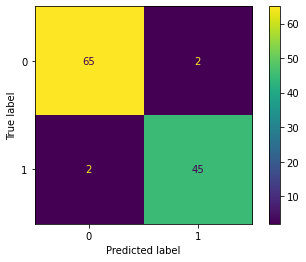

In [77]:
print("GRID_SUPPORT VECTOR CLASSIFIER MODEL")
report(svcgrid)

 # DEEP LEARNING TENSORFLOW CLASSIFICATION MODEL

In [79]:
scaled_X_train.shape

(455, 30)

In [80]:
model = Sequential()
model.add(Dense(60, input_dim=30, activation = 'relu'))
model.add(Dense(60, input_dim=60, activation = 'relu'))
model.add(Dense(60, input_dim=60, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [89]:
keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.99, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1860      
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 9,241
Trainable params: 9,241
Non-trainable params: 0
_________________________________________________________________


In [91]:
sklearn_weights = class_weight.compute_class_weight(f'{"balanced"}', np.unique(y_train), y_train)
sklearn_weights


array([0.78448276, 1.37878788])

In [92]:
# transform array to dictionary that is imputed in keras
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.7844827586206896, 1: 1.378787878787879}

In [93]:
model.fit(scaled_X_train, y_train, epochs=10, batch_size=10, validation_split=0.1, validation_data=None,verbose=1, class_weight=sklearn_weights)

Epoch 1/10
41/41 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2501 - val_accuracy: 0.9565
Epoch 2/10
41/41 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2336 - val_accuracy: 0.9783
Epoch 3/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9976 - val_loss: 0.2372 - val_accuracy: 0.9565
Epoch 4/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1725 - val_accuracy: 0.9565
Epoch 5/10
41/41 [==============================] - 0s 4ms/step - loss: 3.3294e-04 - accuracy: 1.0000 - val_loss: 0.1908 - val_accuracy: 0.9565
Epoch 6/10
41/41 [==============================] - 0s 4ms/step - loss: 1.6432e-04 - accuracy: 1.0000 - val_loss: 0.1908 - val_accuracy: 0.9565
Epoch 7/10
41/41 [==============================] - 0s 4ms/step - loss: 1.1223e-04 - accuracy: 1.0000 - val_loss: 0.1965 - val_accuracy: 0.9565
Epoch 8/

In [ ]:
# keras.backend.clear_session()

# Model Evaluation

In [94]:
preds = model.predict(scaled_X_test)>0.5  # >0.5 is the argument to return True or False boolean instead of probalities

4/4 [==============================] - 0s 2ms/step


In [95]:
preds

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [96]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [97]:
confusion_matrix(y_test,preds)

array([[62,  5],
       [ 1, 46]], dtype=int64)

In [98]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

